# Trabalho 01
- **Disciplina:** Jogos Dinâmicos
- **Aluno:** Iago Magalhães
- **Matricula:** 559973
- **Professor:** Wendley Silva
- **Descrição:** Reproduzir o Tutorial presente no site do Scikit-Learn [Ref. 3], com a adição de outros dois 
algoritmos de Machine Learning no experimento, demonstrando em Tabelas e gráficos qual obteve o melhor resultado.


## Tutorial

## Loading an example dataset

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [2]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Learning and predicting

In [4]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [5]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [7]:
clf.predict(digits.data[-1:])

array([8])

## Conventions

### Type casting

In [6]:
import numpy as np
from sklearn import kernel_approximation

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

transformer = kernel_approximation.RBFSampler()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [7]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

list(clf.predict(iris.data[:3]))

clf.fit(iris.data, iris.target_names[iris.target])

list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

### Refitting and updating parameters

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)
clf.predict(X[:5])

clf.set_params(kernel='rbf').fit(X, y)
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

### Multiclass vs. multilabel fitting

In [9]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [10]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

## Seleção do algoritmo de Machine Learning

### Divisão dos dados em treino e teste

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
import numpy as np

X, y = datasets.load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Tamanho do conjunto de amostras para treino: ', len(x_train))
print('Tamanho do conjunto de classes para treino: ', len(y_train))
print('Tamanho do conjunto de amostras para teste: ', len(x_test))
print('Tamanho do conjunto de classes para teste: ', len(y_test))


Tamanho do conjunto de amostras para treino:  1257
Tamanho do conjunto de classes para treino:  1257
Tamanho do conjunto de amostras para teste:  540
Tamanho do conjunto de classes para teste:  540


### Algoritmo SVM

In [48]:
svm = svm.SVC(gamma=0.001, C=100.)
mtcSVM = cross_val_score(svm, x_train, y_train, cv=10, scoring='accuracy')

In [49]:
svm.fit(x_train, y_train)
predSVM = svm.predict(x_test)

### Algoritmo Naive Bayes

In [16]:
naiveBayes = GaussianNB()
mtcNaiveBayes = cross_val_score(naiveBayes, x_train, y_train, cv=10, scoring='accuracy')

In [17]:
naiveBayes.fit(x_train, y_train)
predNaiveBayes = naiveBayes.predict(x_test)

### Algoritmo KNN

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
mtcKNN = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')

In [19]:
knn.fit(x_train, y_train)
predKNN = knn.predict(x_test)

## Análise dos resultados

### Matriz de confusão

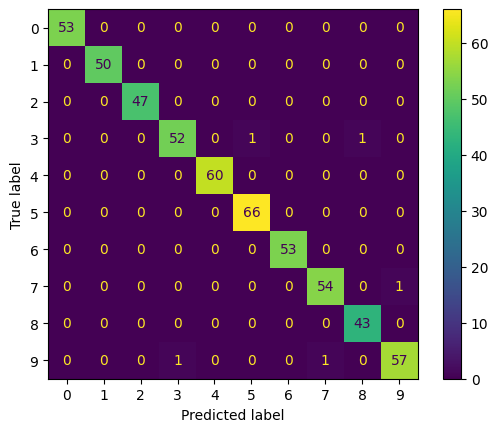

In [50]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, predSVM), display_labels=svm.classes_).plot()
plt.grid(False)
plt.show()

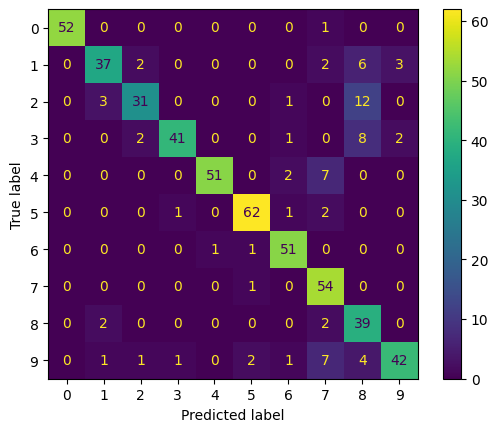

In [51]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, predNaiveBayes), display_labels=naiveBayes.classes_).plot()
plt.grid(False)
plt.show()

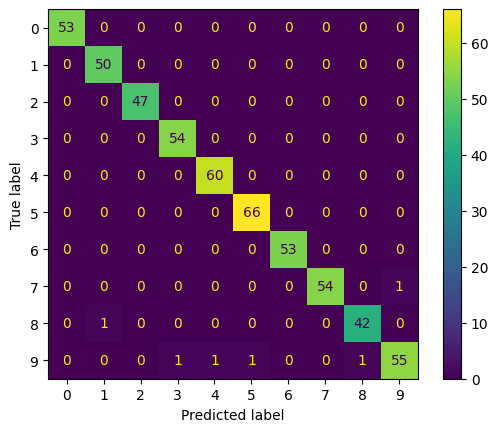

In [43]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, predKNN), display_labels=knn.classes_).plot()
plt.grid(False)
plt.show()

### Métricas de avaliação

In [53]:
accSVM = round(metrics.accuracy_score(y_test, predSVM), 2)
accNaiveBayes = round(metrics.accuracy_score(y_test, predNaiveBayes), 2)
accKNN = round(metrics.accuracy_score(y_test, predKNN), 2)

recallSVM = round(metrics.recall_score(y_test, predSVM, average='macro'), 2)
recallNaiveBayes = round(metrics.recall_score(y_test, predNaiveBayes, average='macro'), 2)
recallKNN = round(metrics.recall_score(y_test, predKNN, average='macro'), 2)

f1scoreSVM = round(metrics.f1_score(y_test, predSVM, average='macro'), 2)
f1scoreNaiveBayes = round(metrics.f1_score(y_test, predNaiveBayes, average='macro'), 2)
f1scoreKNN = round(metrics.f1_score(y_test, predKNN, average='macro'), 2)

precisionSVM = round(metrics.precision_score(y_test, predSVM, average='macro'), 2)
precisionNaiveBayes = round(metrics.precision_score(y_test, predNaiveBayes, average='macro'), 2)
precisionKNN = round(metrics.precision_score(y_test, predKNN, average='macro'), 2)

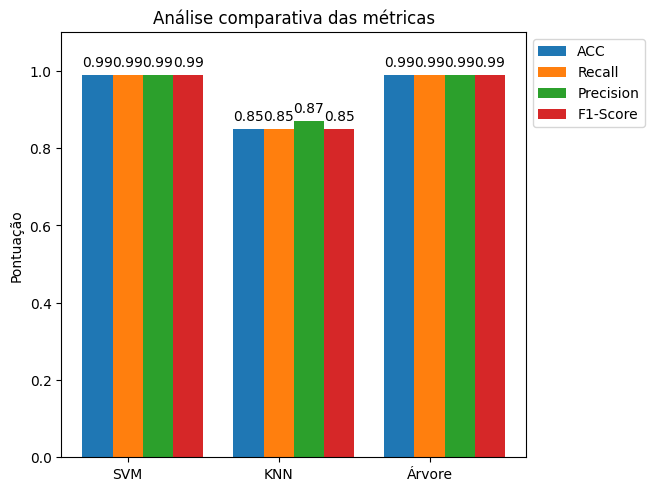

In [64]:
import matplotlib.pyplot as plt
import numpy as np

algoritms = ("SVM", "KNN", "Árvore")
mtc = {
    'ACC': (accSVM, accNaiveBayes, accKNN),
    'Recall': (recallSVM, recallNaiveBayes, recallKNN),
    'Precision':(precisionSVM, precisionNaiveBayes, precisionKNN),
    'F1-Score': (f1scoreSVM, f1scoreNaiveBayes, f1scoreKNN),
}

x = np.arange(len(algoritms))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

for attribute, measurement in mtc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Pontuação')
ax.set_title('Análise comparativa das métricas')
ax.set_xticks(x + width, algoritms)
ax.legend(bbox_to_anchor=(1.27, 1), loc='upper right')
ax.set_ylim(0, 1.1)

plt.show()

[Text(0, 0, '0.99'), Text(0, 0, '0.85'), Text(0, 0, '0.99')]

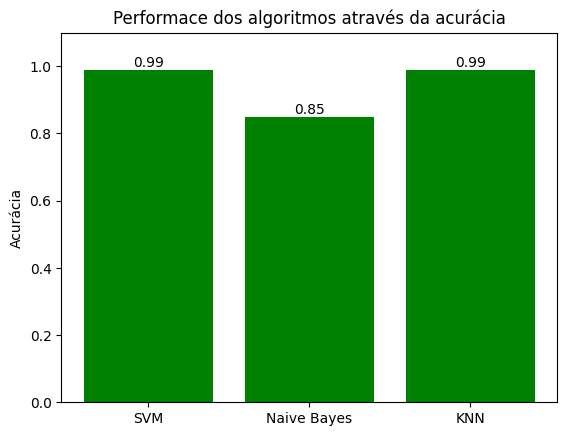

In [78]:
algoritmos = ['SVM', 'Naive Bayes', 'KNN']
acc = [accSVM, accNaiveBayes, accKNN]

fig, ax = plt.subplots()
bar_container = ax.bar(algoritmos, acc, color='green')
ax.set(ylabel='Acurácia', title='Performace dos algoritmos através da acurácia', ylim=(0, 1.1))
ax.bar_label(bar_container)

### Análise de acurácia com validação cruzada

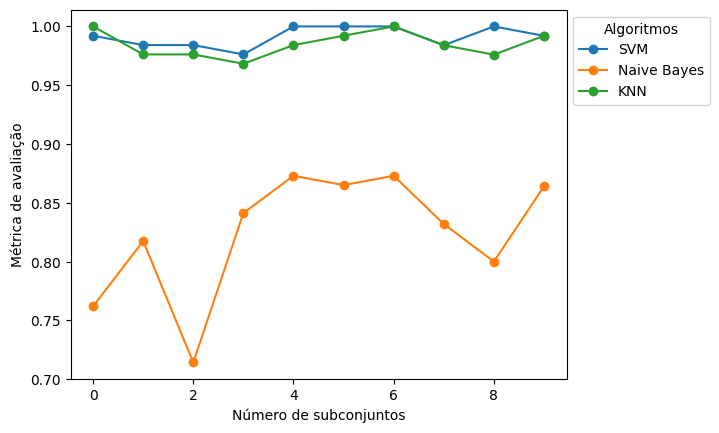

In [85]:
# fig, ax = plt.subplots()

plt.plot(mtcSVM, marker = 'o', label='SVM')
plt.plot(mtcNaiveBayes, marker = 'o', label='Naive Bayes')
plt.plot(mtcKNN, marker = 'o', label='KNN')

plt.legend(bbox_to_anchor=(1, 1), title='Algoritmos')
plt.xlabel('Número de subconjuntos')
plt.ylabel('Métrica de avaliação')

plt.show()

## Referências
- [An introduction to machine learning with scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
- [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
- [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)
